In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
sample_size = np.arange(10, 201)
mean_1 = 1
mean_2 = 1.2
num_exps = 100
p_threshold = 0.05

t_values = np.zeros((num_exps, len(sample_size)))
p_values = np.zeros(len(sample_size))

In [5]:
for index_1 in range(num_exps):
   for index_2, item in enumerate(sample_size):
       data_1 = mean_1 + np.random.randn(item)
       data_2 = mean_2 + np.random.randn(item)
       t_values[index_1,index_2] = stats.ttest_ind(data_2, data_1, equal_var=True)[0]
       df = len(data_1) + len(data_2) - 2
       p_values[index_2] = stats.t.ppf(1 - p_threshold / 2, df)

p_values[:5]

array([2.10092204, 2.08596345, 2.07387307, 2.06389856, 2.05552944])

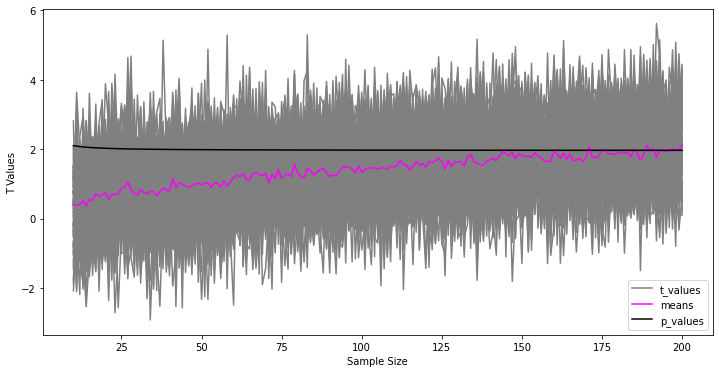

In [4]:
fig, ax = plt.subplots(figsize=(12,6))
 
ax.plot(sample_size, t_values.T, color='gray', label='t_values')
ax.plot(sample_size, t_values.mean(axis=0), color='magenta', label='means')
ax.plot(sample_size, p_values, color='black', label='p_values')

def legend_without_duplicate_labels(ax):
     handles, labels = ax.get_legend_handles_labels()
     unique = [(h, l) for index_1, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:index_1]]
     ax.legend(*zip(*unique))

legend_without_duplicate_labels(ax)
 
ax.set_xlabel('Sample Size')
ax.set_ylabel('T Values')
plt.show()